In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Db_poems.csv", sep=';', encoding='iso-8859-1')

In [5]:
len(df)

306

In [6]:
df.columns

Index(['title', 'isBot', 'madeBy', 'using', 'botPercentage', 'humanPercentage',
       'text'],
      dtype='object')

In [7]:
grouped = df.groupby(by='isBot')
for key, item in grouped:
    print("IsBot : {}, total size of poems : {}".format(key, len(item)))

IsBot : False, total size of poems : 161
IsBot : True, total size of poems : 145


Technology used : Elizabot, number of poem generated : 1
Technology used : Erica T Carter, number of poem generated : 12
Technology used : Google Predictive Search, number of poem generated : 7
Technology used : JGnoetry, number of poem generated : 34
Technology used : Janus Node, number of poem generated : 21
Technology used : M.U.C., number of poem generated : 9
Technology used : Nailpolish, number of poem generated : 1
Technology used : RACTER, number of poem generated : 17
Technology used : Ray Kurzweil's Cybernetic Poet, number of poem generated : 31
Technology used : That Can Be My Next Tweet, number of poem generated : 4
Technology used : ThinkZone Poetry Generator, number of poem generated : 8


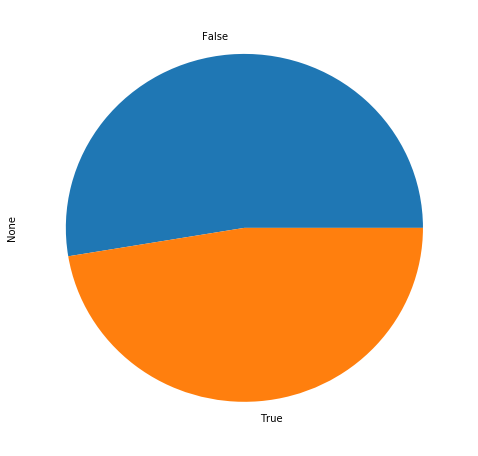

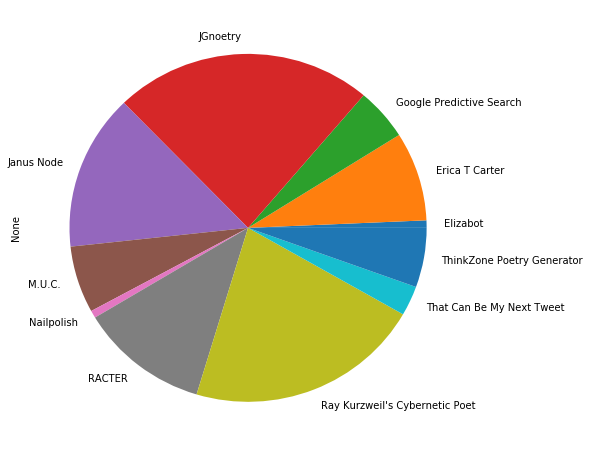

In [8]:
for key, item in grouped:
    if key:
        technologies = item.groupby(by='using')

for key, item in technologies:
    print("Technology used : {}, number of poem generated : {}".format(key, len(item)))

a = grouped.size()
a.plot.pie(figsize=(8,8))
plt.show()

b = technologies.size()
b.plot.pie(figsize=(8,8))
plt.show()



In [9]:
#I will assign a score to each poem, to be able to sort them. 
def assignScore(row):
    isBot = bool(row['isBot'])
    humanPerc = int(row['humanPercentage'])
    if isBot:
        return humanPerc
    else:
        return 100 - humanPerc

df['score'] = df.apply(assignScore, axis=1)

hundred_hard_poems_df = df.sort_values(by=['score'], ascending=False).head(100)

hundred_hard_poems_df

,title,isBot,madeBy,using,botPercentage,humanPercentage,text,score
142,cut-opinions,False,Deanna Ferguson,NaN,74,26,cut opinions tear tasteful\nhungers huge groun...,74
225,red-faces,False,Gertrude Stein,NaN,69,31,Red flags the reason for pretty flags.\nAnd ri...,69
179,ukulele,False,Aaron Koh,NaN,66,34,my ukulele is not a baby\nplease do not reply ...,66
28,light-moon,False,Gertrude Stein,NaN,66,34,A light in the moon the only light is on Sunda...,66
95,study-nature,False,Gertrude Stein,NaN,65,35,I do. \nVictim. \nSales \nMet \nWipe \nHer \nL...,65
42,6,True,Janus Node,Janus Node,35,65,you\n \n \n are\n \n inscribed\n ...,65
0,apple,False,Gertrude Stein,NaN,64,36,"Apple plum, carpet steak, seed clam, colored w...",64
168,cinema-calendar-abstract-heart-09,False,Tristan Tzara,NaN,64,36,the fibres give in to your starry warmth\na la...,64
45,charlatan,False,Corey Wakeling,NaN,63,37,"You say you want to end the charlatan, yet\nyo...",63
19,spotless-earth,False,Deanna Ferguson,NaN,62,38,spotless earth resigned by hearse and stroke\n...,62


In [10]:
df

,title,isBot,madeBy,using,botPercentage,humanPercentage,text,score
0,apple,False,Gertrude Stein,NaN,64,36,"Apple plum, carpet steak, seed clam, colored w...",64
1,vegetable-swallow,False,Tristan Tzara,NaN,57,43,two smiles meet towards\nthe child-wheel of my...,57
2,silence,True,Poets,Ray Kurzweil's Cybernetic Poet,62,38,Whirling silence\nprophetic poses\nof shiny ob...,38
3,joy,False,Sara Teasedale,NaN,29,71,"I am wild, I will sing to the trees,\nI will s...",29
4,picking-flowers,False,Ho Xuan Huong,NaN,36,64,"If you want to pick flowers, you have to hike....",36
5,points-motion,False,Vito Acconci,NaN,56,44,POINTS FOR MOTION (PLACE SETTING): the nouns i...,56
6,angel,True,Poets,Ray Kurzweil's Cybernetic Poet,51,49,"Beams of the dawn at the angel\nwith a calm, s...",49
7,science,False,Robinson Jeffers,NaN,45,55,"Man, introverted man, having crossed\nIn passa...",45
8,pain,True,Ray Kurzweil and Pat Camarena Rose,Ray Kurzweil's Cybernetic Poet,55,45,The pain:\ntrue\nimagined\ncarnal\nfantasy\npr...,45
9,crucifixion-xing,False,K. Silem Mohammad,NaN,59,41,THE worst thing that could happen \nA familiar...,59


In [11]:
DWFQuiz_titles = ['his-watch','untitled2','cocaine',\
                  '_smcleanallthingsness-es_','mounted-umbrella',\
                  'sound','call-me-ishmael','some-men','her-teardrops','smoke']
DWFQ_df = df[df['title'].isin(DWFQuiz_titles)]
len(DWFQ_df)
DWFQ_df

,title,isBot,madeBy,using,botPercentage,humanPercentage,text,score
47,_smcleanallthingsness-es_,False,Mez Breeze,NaN,41,59,[THere r: \nsmAllnesses of the ca(|u)rved disc...,41
55,some-men,True,Every Google User,Google Predictive Search,39,61,some men just want to watch the world burn \ns...,61
113,call-me-ishmael,False,Jackson Mac Low,NaN,48,52,Circulation. And long long \nMind every \nInte...,48
129,untitled2,True,Racter,RACTER,54,46,A nasty dull rumrunning pig\nHad fingernails w...,46
144,her-teardrops,False,Jessica Ray,NaN,31,69,"She cries herself to sleep every night,\nholdi...",31
147,mounted-umbrella,False,Gertrude Stein,NaN,49,51,WHAT was the use of not leaving it there where...,49
163,his-watch,False,Gerard Manley Hopkins,NaN,52,48,"Mortal my mate, bearing my rock-a-heart\nWarm ...",52
284,smoke,True,Ray Kurzweil,Ray Kurzweil's Cybernetic Poet,59,41,Imagine now the dark smoke\nawaken to fly\nall...,41
293,sound,True,Jim Carpenter,Erica T Carter,57,43,I might touch myself\nI do not want\n ...,43
298,cocaine,True,A random collection of text,That Can Be My Next Tweet,50,50,a phoenix rising \nfrom an extremely incrimina...,50


In [12]:
import sklearn

In [13]:
botList = ['JGnoetry','Ray Kurzweil\'s Cybernetic Poet', 'Janus Node','RACTER','Elizabot', \
          'Erica T Carter','Google Predictive Search', 'M.U.C.','Nailpolish',\
           'That Can Be My Next Tweet','ThinkZone Poetry Generator']

def twoCategory(s):
    if s not in botList:
        return 1
    else:
        return 2
    
def nCategory(s):
    if s not in botList:
        return 1
    elif s == 'JGnoetry':
        return 2
    elif s == 'Ray Kurzweil\'s Cybernetic Poet':
        return 3
    elif s == 'Janus Node':
        return 4
    elif s == 'RACTER':
        return 5
    else:
        return 6

def extractXsetYset(dataf, categoryMapping):
    X_train = dataf['text']
    Y_train = dataf['using'].map(lambda v: categoryMapping(str(v)))
    return X_train, Y_train

In [14]:
from sklearn.pipeline import Pipeline
import numpy as np

def crossValidate(N, Pip, data, categoryMapping):
    #the training set 
    df_size = len(data)
    portion = int((1/N) * (df_size))
    start = 0
    end = portion
    results = []
    for i in range(N):
        test_set = data.loc[start:end]
        test_titles = list(test_set['title'])
        training_set = data[~data['title'].isin(test_titles)]
        x, y = extractXsetYset(training_set, categoryMapping)
        text_clf = Pipeline(Pip)
        text_clf = text_clf.fit(x, y)
        x_test, y_test = extractXsetYset(test_set, twoCategory)
        predicted = text_clf.predict(x_test)
        start += portion
        end += portion
        results.append(np.mean(predicted == y_test))
    return results
        

### 2-NB

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

def resultOutPut(method, res):    
    print("Raw results of all cross-validation : ")
    print(res)
    print("Average prediction success of the %s model is %lf%% with %lf%% of standard deviation" % (method, np.mean(res)*100, np.std(res)*100))

pip = [('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB())]

resultOutPut("2 class naive bayes", crossValidate(4, pip, df, twoCategory))

Raw results of all cross-validation : 
[0.6363636363636364, 0.6493506493506493, 0.5974025974025974, 0.5714285714285714]
Average prediction success of the 2 class naive bayes model is 61.363636% with 3.097205% of standard deviation


### 6-NB

In [34]:
res = crossValidate(4, pip, df, nCategory)
resultOutPut("6 classes naive bayes", crossValidate(4, pip, df, nCategory))

Raw results of all cross-validation : 
[0.5324675324675324, 0.5324675324675324, 0.4935064935064935, 0.5454545454545454]
Average prediction success of the 6 classes naive bayes model is 52.597403% with 1.948052% of standard deviation


### hardest poem challenge : NB algo

In [16]:
crossValiValue = 1
def printHumansAverageSuccess(hardestDf, portion):
    hardest_p_len = len(hardestDf)
    z_o_i = hardestDf.head(int(portion * hardest_p_len))
    return np.mean(z_o_i['score'])

def hardestPoemChallenge(hardestDf, dataf, Pip, portion, categoryMap):
    hardest_p_len = len(hardestDf)
    test_set = hardestDf.head(int(portion * hardest_p_len))
    test_titles = list(test_set['title'])
    train_set = dataf[~dataf['title'].isin(test_titles)]

    x, y = extractXsetYset(train_set, categoryMap)
    text_clf = Pipeline(Pip)
    text_clf = text_clf.fit(x, y)
    x_test, y_test = extractXsetYset(test_set, twoCategory)
    predicted = text_clf.predict(x_test)
    return np.mean(predicted == y_test)

print("With NB algorithm 2-class, on %d hardest poems, Bot Success : %lf Humans Success : %lf" % \
      (100* crossValiValue, 100 * hardestPoemChallenge(hundred_hard_poems_df, df, pip, crossValiValue,twoCategory),\
       printHumansAverageSuccess(hundred_hard_poems_df, crossValiValue)))

With NB algorithm 2-class, on 100 hardest poems, Bot Success : 65.000000 Humans Success : 53.420000


In [36]:

print("With NB algorithm 6-class, on %d hardest poems, Bot Success : %lf Humans Success : %lf" % \
      (100* crossValiValue, 100 * hardestPoemChallenge(hundred_hard_poems_df, df, pip, crossValiValue,nCategory),\
       printHumansAverageSuccess(hundred_hard_poems_df, crossValiValue)))

With NB algorithm 6-class, on 100 hardest poems, Bot Success : 58.000000 Humans Success : 53.420000


### DWF Quiz challenge : NB algo

In [37]:
print("With NB algorithm 2-class, on the DWF Quiz, Bot Success : %lf Humans Success : %lf" % \
      (100 * hardestPoemChallenge(DWFQ_df, df, pip, 1 ,twoCategory),\
       printHumansAverageSuccess(DWFQ_df, crossValiValue)))

With NB algorithm 2-class, on the DWF Quiz, Bot Success : 50.000000 Humans Success : 46.200000


In [38]:
print("With NB algorithm 6-class, on the DWF Quiz, Bot Success : %lf Humans Success : %lf" % \
      (100 * hardestPoemChallenge(DWFQ_df, df, pip, 1 ,nCategory),\
       printHumansAverageSuccess(DWFQ_df, crossValiValue)))

With NB algorithm 6-class, on the DWF Quiz, Bot Success : 50.000000 Humans Success : 46.200000


### SVM 2 categories

In [17]:
from sklearn.linear_model import SGDClassifier
svm_pip = [('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, n_iter=5, random_state=42))]

resultOutPut("2 initial SVM", crossValidate(4, svm_pip, df, twoCategory))

Raw results of all cross-validation : 
[0.6623376623376623, 0.7272727272727273, 0.7532467532467533, 0.5974025974025974]
Average prediction success of the 2 initial SVM model is 68.506494% with 6.048031% of standard deviation


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


### SVM 6 categories

In [40]:
resultOutPut("6 initial SVM", crossValidate(4, svm_pip, df, nCategory))

Raw results of all cross-validation : 
[0.5714285714285714, 0.5194805194805194, 0.5194805194805194, 0.4935064935064935]
Average prediction success of the 6 initial SVM model is 52.597403% with 2.830454% of standard deviation


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


### hardest poem challenge : SVM algo

In [41]:
portion = 1
print("With SVM algorithm 2-class, on %d hardest poems, Bot Success : %lf Humans Success : %lf" % \
      (100* portion, 100 * hardestPoemChallenge(hundred_hard_poems_df, df, svm_pip, portion,twoCategory),\
       printHumansAverageSuccess(hundred_hard_poems_df, portion)))

With SVM algorithm 2-class, on 100 hardest poems, Bot Success : 73.000000 Humans Success : 53.420000


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [42]:
print("With SVM algorithm 6-class, on %d hardest poems, Bot Success : %lf Humans Success : %lf" % \
      (100* crossValiValue, 100 * hardestPoemChallenge(hundred_hard_poems_df, df, svm_pip, crossValiValue,nCategory),\
       printHumansAverageSuccess(hundred_hard_poems_df, crossValiValue)))

With SVM algorithm 6-class, on 100 hardest poems, Bot Success : 56.000000 Humans Success : 53.420000


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


### DWF Quiz challenge : SVM algo

In [43]:
print("With SVM algorithm 2-class, on the DWF Quiz, Bot Success : %lf Humans Success : %lf" % \
      (100 * hardestPoemChallenge(DWFQ_df, df, svm_pip, 1,twoCategory),\
       printHumansAverageSuccess(DWFQ_df, 1)))

With SVM algorithm 2-class, on the DWF Quiz, Bot Success : 60.000000 Humans Success : 46.200000


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [44]:
print("With SVM algorithm 6-class, on the DWF Quiz, Bot Success : %lf Humans Success : %lf" % \
      ( 100 * hardestPoemChallenge(DWFQ_df, df, svm_pip, 1,nCategory),\
       printHumansAverageSuccess(DWFQ_df, 1)))

With SVM algorithm 6-class, on the DWF Quiz, Bot Success : 50.000000 Humans Success : 46.200000


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_pip = [('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-ada', AdaBoostClassifier())]

resultOutPut("2 initial SVM", crossValidate(4, ada_pip, df, twoCategory))

Raw results of all cross-validation : 
[0.6103896103896104, 0.6493506493506493, 0.6623376623376623, 0.5714285714285714]
Average prediction success of the 2 initial SVM model is 62.337662% with 3.556640% of standard deviation


## Grid-Search Optimisation

In [20]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3),
}
x_train, y_train2 = extractXsetYset(df, twoCategory)

NB_pip = [('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB())]
SVM_pip = [('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, n_iter=5, random_state=42))]

nb_text_clf = Pipeline(NB_pip)
nb_text_clf = nb_text_clf.fit(x_train, y_train2)
nb_gs_clf = GridSearchCV(nb_text_clf, parameters, n_jobs=-1)
nb_gs_clf = nb_gs_clf.fit(x_train, y_train2)
print("Best score for NB : %lf"%(nb_gs_clf.best_score_))
nb_gs_clf.best_params_

Best score for NB : 0.718954


{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

In [47]:

x_train, y_train2 = extractXsetYset(df, nCategory)
nb_text_clf = nb_text_clf.fit(x_train, y_train2)
nb_gs_clf = GridSearchCV(nb_text_clf, parameters, n_jobs=-1)
nb_gs_clf = nb_gs_clf.fit(x_train, y_train2)
print("Best score for NB : %lf"%(nb_gs_clf.best_score_))
nb_gs_clf.best_params_

Best score for NB : 0.673203


{'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

### SVM 2 Category Optimization

In [50]:
svm_parameters = {'vect__ngram_range': [(1, 2), (1, 1)],
               'tfidf__use_idf': (False, True),
               'clf-svm__alpha': (1e-3, 1e-2),
               'clf-svm__penalty': ('l2', 'l1', 'elasticnet'),
               'clf-svm__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron','squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'),
                
}
svm_text_clf = Pipeline(SVM_pip)
svm_text_clf = svm_text_clf.fit(x_train, y_train2)
svm_gs_clf = GridSearchCV(svm_text_clf, svm_parameters, n_jobs=-1)
svm_gs_clf = svm_gs_clf.fit(x_train, y_train2)
print("Best score for SVM : %lf"%(svm_gs_clf.best_score_))
svm_best_params = svm_gs_clf.best_params_
svm_best_params

Best score for SVM : 0.653595


{'clf-svm__alpha': 0.01,
 'clf-svm__loss': 'perceptron',
 'clf-svm__penalty': 'l2',
 'tfidf__use_idf': True,
 'vect__ngram_range': (1, 2)}

### SVM 6 Category Optimization

In [51]:

x_train, y_train6 = extractXsetYset(df, nCategory)
svm_text_clf = svm_text_clf.fit(x_train, y_train6)
svm_gs_clf = GridSearchCV(svm_text_clf, parameters, n_jobs=-1)
svm_gs_clf = svm_gs_clf.fit(x_train, y_train6)
print("Best score for SVM : %lf"%(svm_gs_clf.best_score_))
svm_best_params = svm_gs_clf.best_params_
svm_best_params

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10d0bded0, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10d0bded0, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '\nx_train, y_train6 = extractXsetYset(df, nCatego..._params = svm_gs_clf.best_params_\nsvm_best_params', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 7, 10, 43, 15, 826182, tzinfo=tzutc()), 'msg_id': '13C3F7D4A5174F918A5E1A66C181ED84', 'msg_type': 'execute_request', 'session': '46FEBC98470D4520A9F162D3C8490996', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '13C3F7D4A5174F918A5E1A66C181ED84', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'46FEBC98470D4520A9F162D3C8490996']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '\nx_train, y_train6 = extractXsetYset(df, nCatego..._params = svm_gs_clf.best_params_\nsvm_best_params', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 7, 10, 43, 15, 826182, tzinfo=tzutc()), 'msg_id': '13C3F7D4A5174F918A5E1A66C181ED84', 'msg_type': 'execute_request', 'session': '46FEBC98470D4520A9F162D3C8490996', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '13C3F7D4A5174F918A5E1A66C181ED84', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'46FEBC98470D4520A9F162D3C8490996'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '\nx_train, y_train6 = extractXsetYset(df, nCatego..._params = svm_gs_clf.best_params_\nsvm_best_params', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 7, 10, 43, 15, 826182, tzinfo=tzutc()), 'msg_id': '13C3F7D4A5174F918A5E1A66C181ED84', 'msg_type': 'execute_request', 'session': '46FEBC98470D4520A9F162D3C8490996', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '13C3F7D4A5174F918A5E1A66C181ED84', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='\nx_train, y_train6 = extractXsetYset(df, nCatego..._params = svm_gs_clf.best_params_\nsvm_best_params', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '\nx_train, y_train6 = extractXsetYset(df, nCatego..._params = svm_gs_clf.best_params_\nsvm_best_params'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('\nx_train, y_train6 = extractXsetYset(df, nCatego..._params = svm_gs_clf.best_params_\nsvm_best_params',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('\nx_train, y_train6 = extractXsetYset(df, nCatego..._params = svm_gs_clf.best_params_\nsvm_best_params',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='\nx_train, y_train6 = extractXsetYset(df, nCatego..._params = svm_gs_clf.best_params_\nsvm_best_params', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-51-3d5222a05391>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 11eee9160, execution_..._before_exec=None error_in_exec=None result=None>)
   2797 
   2798         try:
   2799             for i, node in enumerate(to_run_exec):
   2800                 mod = ast.Module([node])
   2801                 code = compiler(mod, cell_name, "exec")
-> 2802                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x11ed55ed0, file "<ipython-input-51-3d5222a05391>", line 5>
        result = <ExecutionResult object at 11eee9160, execution_..._before_exec=None error_in_exec=None result=None>
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x11ed55ed0, file "<ipython-input-51-3d5222a05391>", line 5>, result=<ExecutionResult object at 11eee9160, execution_..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x11ed55ed0, file "<ipython-input-51-3d5222a05391>", line 5>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'DWFQ_df':                          title  isBot           ... rising \nfrom an extremely incrimina...     50  , 'DWFQuiz_titles': ['his-watch', 'untitled2', 'cocaine', '_smcleanallthingsness-es_', 'mounted-umbrella', 'sound', 'call-me-ishmael', 'some-men', 'her-teardrops', 'smoke'], 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\nimport warnings\nwarnings.filterwarnings('ignore')", 'df = pd.read_csv("Db_poems.csv", sep=\';\', encoding=\'iso-8859-1\')', 'len(df)', 'df.columns', 'grouped = df.groupby(by=\'isBot\')\nfor key, item i...total size of poems : {}".format(key, len(item)))', 'for key, item in grouped:\n    if key:\n        te...r of poem generated : {}".format(key, len(item)))', "import pandas as pd\nimport warnings\nwarnings.filterwarnings('ignore')", 'df = pd.read_csv("Db_poems.csv", sep=\';\', encoding=\'iso-8859-1\')', 'len(df)', 'df.columns', 'grouped = df.groupby(by=\'isBot\')\nfor key, item i...total size of poems : {}".format(key, len(item)))', 'for key, item in grouped:\n    if key:\n        te...r of poem generated : {}".format(key, len(item)))', '#I will assign a score to each poem, to be able ...ascending=False).head(100)\n\nhundred_hard_poems_df', 'df', 'for key, item in grouped:\n    if key:\n        te...\n\na = df.grouped.size()\na.plot.pie(figsize=(4,4))', 'for key, item in grouped:\n    if key:\n        te...)))\n\na = grouped.size()\na.plot.pie(figsize=(4,4))', 'for key, item in grouped:\n    if key:\n        te...uped.size()\na.plot.pie(figsize=(4,4))\nplot.show()', 'for key, item in grouped:\n    if key:\n        te...ouped.size()\na.plot.pie(figsize=(4,4))\nplt.show()', "import pandas as pd\nimport warnings\nimport matplotlib as plt\nwarnings.filterwarnings('ignore')", ...], 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'NB_pip': [('vect', CountVectorizer(analyzer='word', binary=False, d...\w+\\b',
        tokenizer=None, vocabulary=None)), ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))], 'Out': {3: 306, 4: Index(['title', 'isBot', 'madeBy', 'using', 'bot...ercentage',
       'text'],
      dtype='object'), 9: 306, 10: Index(['title', 'isBot', 'madeBy', 'using', 'bot...ercentage',
       'text'],
      dtype='object'), 13:                                           title ...innocently,\n...     46  

[100 rows x 8 columns], 14:                                           title ...chased\nand I...     29  

[306 rows x 8 columns], 16: <matplotlib.axes._subplots.AxesSubplot object>, 23: [], 27:                                           title ...innocently,\n...     46  

[100 rows x 8 columns], 28:                                           title ...chased\nand I...     29  

[306 rows x 8 columns], ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'DWFQ_df':                          title  isBot           ... rising \nfrom an extremely incrimina...     50  , 'DWFQuiz_titles': ['his-watch', 'untitled2', 'cocaine', '_smcleanallthingsness-es_', 'mounted-umbrella', 'sound', 'call-me-ishmael', 'some-men', 'her-teardrops', 'smoke'], 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\nimport warnings\nwarnings.filterwarnings('ignore')", 'df = pd.read_csv("Db_poems.csv", sep=\';\', encoding=\'iso-8859-1\')', 'len(df)', 'df.columns', 'grouped = df.groupby(by=\'isBot\')\nfor key, item i...total size of poems : {}".format(key, len(item)))', 'for key, item in grouped:\n    if key:\n        te...r of poem generated : {}".format(key, len(item)))', "import pandas as pd\nimport warnings\nwarnings.filterwarnings('ignore')", 'df = pd.read_csv("Db_poems.csv", sep=\';\', encoding=\'iso-8859-1\')', 'len(df)', 'df.columns', 'grouped = df.groupby(by=\'isBot\')\nfor key, item i...total size of poems : {}".format(key, len(item)))', 'for key, item in grouped:\n    if key:\n        te...r of poem generated : {}".format(key, len(item)))', '#I will assign a score to each poem, to be able ...ascending=False).head(100)\n\nhundred_hard_poems_df', 'df', 'for key, item in grouped:\n    if key:\n        te...\n\na = df.grouped.size()\na.plot.pie(figsize=(4,4))', 'for key, item in grouped:\n    if key:\n        te...)))\n\na = grouped.size()\na.plot.pie(figsize=(4,4))', 'for key, item in grouped:\n    if key:\n        te...uped.size()\na.plot.pie(figsize=(4,4))\nplot.show()', 'for key, item in grouped:\n    if key:\n        te...ouped.size()\na.plot.pie(figsize=(4,4))\nplt.show()', "import pandas as pd\nimport warnings\nimport matplotlib as plt\nwarnings.filterwarnings('ignore')", ...], 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'NB_pip': [('vect', CountVectorizer(analyzer='word', binary=False, d...\w+\\b',
        tokenizer=None, vocabulary=None)), ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))], 'Out': {3: 306, 4: Index(['title', 'isBot', 'madeBy', 'using', 'bot...ercentage',
       'text'],
      dtype='object'), 9: 306, 10: Index(['title', 'isBot', 'madeBy', 'using', 'bot...ercentage',
       'text'],
      dtype='object'), 13:                                           title ...innocently,\n...     46  

[100 rows x 8 columns], 14:                                           title ...chased\nand I...     29  

[306 rows x 8 columns], 16: <matplotlib.axes._subplots.AxesSubplot object>, 23: [], 27:                                           title ...innocently,\n...     46  

[100 rows x 8 columns], 28:                                           title ...chased\nand I...     29  

[306 rows x 8 columns], ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
/Users/cedricviaccoz/botvsbotornot/<ipython-input-51-3d5222a05391> in <module>()
      1 
      2 x_train, y_train6 = extractXsetYset(df, nCategory)
      3 svm_text_clf = svm_text_clf.fit(x_train, y_train6)
      4 svm_gs_clf = GridSearchCV(svm_text_clf, parameters, n_jobs=-1)
----> 5 svm_gs_clf = svm_gs_clf.fit(x_train, y_train6)
      6 print("Best score for SVM : %lf"%(svm_gs_clf.best_score_))
      7 svm_best_params = svm_gs_clf.best_params_
      8 svm_best_params

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=0      Apple plum, carpet steak, seed clam, colo...\nand I...
Name: text, Length: 306, dtype: object, y=0      1
1      1
2      3
3      1
4      1
5  ...1
305    1
Name: using, Length: 306, dtype: int64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = 0      Apple plum, carpet steak, seed clam, colo...\nand I...
Name: text, Length: 306, dtype: object
        y = 0      1
1      1
2      3
3      1
4      1
5  ...1
305    1
Name: using, Length: 306, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon May  7 12:43:16 2018
PID: 24438                              Python 3.6.3: /anaconda3/bin/python
...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('vect', Count...
       tol=None, verbose=0, warm_start=False))]), 0      Apple plum, carpet steak, seed clam, colo...\nand I...
Name: text, Length: 306, dtype: object, 0      1
1      1
2      3
3      1
4      1
5  ...1
305    1
Name: using, Length: 306, dtype: int64, {'score': <function _passthrough_scorer>}, array([ 86,  93, 101, 105, 106, 107, 108, 109, 1..., 298,
       299, 300, 301, 302, 303, 304, 305]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...96,  97,  98,  99, 100, 102, 103, 104, 110, 129]), 0, {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('vect', Count...
       tol=None, verbose=0, warm_start=False))]), 0      Apple plum, carpet steak, seed clam, colo...\nand I...
Name: text, Length: 306, dtype: object, 0      1
1      1
2      3
3      1
4      1
5  ...1
305    1
Name: using, Length: 306, dtype: int64, {'score': <function _passthrough_scorer>}, array([ 86,  93, 101, 105, 106, 107, 108, 109, 1..., 298,
       299, 300, 301, 302, 303, 304, 305]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...96,  97,  98,  99, 100, 102, 103, 104, 110, 129]), 0, {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('vect', Count...
       tol=None, verbose=0, warm_start=False))]), X=0      Apple plum, carpet steak, seed clam, colo...\nand I...
Name: text, Length: 306, dtype: object, y=0      1
1      1
2      3
3      1
4      1
5  ...1
305    1
Name: using, Length: 306, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([ 86,  93, 101, 105, 106, 107, 108, 109, 1..., 298,
       299, 300, 301, 302, 303, 304, 305]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...96,  97,  98,  99, 100, 102, 103, 104, 110, 129]), verbose=0, parameters={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me...       tol=None, verbose=0, warm_start=False))])>
        parameters = {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...
       tol=None, verbose=0, warm_start=False))]), **kwargs={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)})
    137 
    138         Returns
    139         -------
    140         self
    141         """
--> 142         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi...       tol=None, verbose=0, warm_start=False))])>
        kwargs = {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
    143         return self
    144 
    145     def _validate_steps(self):
    146         names, estimators = zip(*self.steps)

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/utils/metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...
       tol=None, verbose=0, warm_start=False))]), attr='steps', **params={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me...       tol=None, verbose=0, warm_start=False))])>
        params = {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/base.py in set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...
       tol=None, verbose=0, warm_start=False))]), **params={'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'clf'
        self = Pipeline(memory=None,
     steps=[('vect', Count...
       tol=None, verbose=0, warm_start=False))])
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter clf for estimator Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

### Optimized NB Runthrough

#### 1. 2-Category Cross-Validation Test

In [52]:
opt_nb_pip_2 = [('vect', CountVectorizer((1,2))),
                      ('clf', MultinomialNB(alpha=1e-2, fit_prior=True))]

resultOutPut("2 category optimized NB", crossValidate(4, opt_nb_pip_2, df, twoCategory))

Raw results of all cross-validation : 
[0.6883116883116883, 0.7402597402597403, 0.7272727272727273, 0.6753246753246753]
Average prediction success of the 2 category optimized NB model is 70.779221% with 2.677341% of standard deviation


#### 2. 6-Category Cross-Validation Test

In [54]:
#GridSearch showed the same parameters can be applied for 2 and 6 categories.
resultOutPut("6 category optimized NB", crossValidate(4, opt_nb_pip_2, df, nCategory))

Raw results of all cross-validation : 
[0.6103896103896104, 0.5714285714285714, 0.5714285714285714, 0.5584415584415584]
Average prediction success of the 6 category optimized NB model is 57.792208% with 1.948052% of standard deviation


#### 3. 2-Category 100 Hardest Poems Challenge

In [55]:
print("With optimized NB algorithm 2-class, on %d hardest poems, Bot's Success : %.2lf%% (previous 65) Humans Success : %.2lf%%" % \
      (100* crossValiValue, 100 * hardestPoemChallenge(hundred_hard_poems_df, df, opt_nb_pip_2, crossValiValue,twoCategory),\
       printHumansAverageSuccess(hundred_hard_poems_df, crossValiValue)))

With optimized NB algorithm 2-class, on 100 hardest poems, Bot's Success : 71.00% (previous 65) Humans Success : 53.42%


#### 4. 6-Category 100 Hardest Poems Challenge

In [56]:
print("With optimized NB algorithm 2-class, on %d hardest poems, Bot's Success : %.2lf%% (previous 58) Humans Success : %.2lf%%" % \
      (100* crossValiValue, 100 * hardestPoemChallenge(hundred_hard_poems_df, df, opt_nb_pip_2, crossValiValue,nCategory),\
       printHumansAverageSuccess(hundred_hard_poems_df, crossValiValue)))

With optimized NB algorithm 2-class, on 100 hardest poems, Bot's Success : 54.00% (previous 58) Humans Success : 53.42%


In [57]:
print("With NB algorithm 2-class, on the DWF Quiz, Bot Success : %lf Humans Success : %lf" % \
      (100 * hardestPoemChallenge(DWFQ_df, df, pip, 1 ,twoCategory),\
       printHumansAverageSuccess(DWFQ_df, crossValiValue)))

With NB algorithm 2-class, on the DWF Quiz, Bot Success : 50.000000 Humans Success : 46.200000


### Optimized SVM Runthrough

In [58]:
opt_svm_pip_2 = [('vect', CountVectorizer((1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='modified_huber', penalty='l2',
                                            alpha=1e-3, n_iter=5, random_state=42))]
resultOutPut("2 category optimized SVM", crossValidate(4, opt_svm_pip_2, df, twoCategory))


Raw results of all cross-validation : 
[0.6623376623376623, 0.7662337662337663, 0.7532467532467533, 0.5974025974025974]
Average prediction success of the 2 category optimized SVM model is 69.480519% with 6.902692% of standard deviation


In [59]:
opt_svm_pip_6 = [('vect', CountVectorizer((1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='perceptron', penalty='l2',
                                            alpha=1e-2, n_iter=5, random_state=42))]

resultOutPut("6 category optimized SVM", crossValidate(4, opt_svm_pip_6, df, nCategory))

Raw results of all cross-validation : 
[0.45454545454545453, 0.4805194805194805, 0.44155844155844154, 0.4935064935064935]
Average prediction success of the 6 category optimized SVM model is 46.753247% with 2.053427% of standard deviation


## Logistic Regression Model 

### Grid Search Optimization

In [22]:
from sklearn.linear_model import LogisticRegression
lr_pip = [('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-lr', LogisticRegression())]

In [21]:

parameters = {'vect__ngram_range': [(1, 2), (1, 1)],
               'tfidf__use_idf': (False, True),
               'clf-lr__tol': (1e-3, 1e-2, 1e-4, 1e-5),
               'clf-lr__penalty': ('l2', 'l1'),
              'clf-lr__C': (1e-3, 1e-2, 1e-1, 1, 1e1,1e2, 1e3 )
}

x_train, y_train2 = extractXsetYset(df, twoCategory)
lr_text_clf = Pipeline(lr_pip)
lr_text_clf = lr_text_clf.fit(x_train, y_train2)
lr_gs_clf = GridSearchCV(lr_text_clf, parameters, n_jobs=-1)
lr_gs_clf = lr_gs_clf.fit(x_train, y_train2)
print("Best score for 2-class Logistic Regression : %lf"%(lr_gs_clf.best_score_))
lr_gs_clf.best_params_

Best score for 2-class Logistic Regression : 0.696078


{'clf-lr__C': 10.0,
 'clf-lr__penalty': 'l2',
 'clf-lr__tol': 0.001,
 'tfidf__use_idf': False,
 'vect__ngram_range': (1, 1)}

In [61]:
x_train, y_train6 = extractXsetYset(df, nCategory)
lr_text_clf = Pipeline(lr_pip)
lr_text_clf = lr_text_clf.fit(x_train, y_train6)
lr_gs_clf = GridSearchCV(lr_text_clf, parameters, n_jobs=-1)
lr_gs_clf = lr_gs_clf.fit(x_train, y_train6)
print("Best score for 6-class Logistic Regression : %lf"%(lr_gs_clf.best_score_))
lr_gs_clf.best_params_

Best score for 6-class Logistic Regression : 0.633987


{'clf-lr__C': 1000.0,
 'clf-lr__penalty': 'l2',
 'clf-lr__tol': 0.01,
 'tfidf__use_idf': True,
 'vect__ngram_range': (1, 1)}

Best excpected score for optimized logistic regression shows the same score as optimized SVM. Thus I won't bother trying to test the model and do the challenges with this model, as my Optimized Naive Bayesian achieves better results.

### Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier



In [81]:
rf_pip = [('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-rf', RandomForestClassifier())]

parameters = {'vect__ngram_range': [(1, 2), (1, 1)],
               'tfidf__use_idf': (False, True),
               'clf-rf__criterion': ['gini', 'entropy'],
               'clf-rf__max_features': ('auto', 'log2', None),
              'clf-rf__n_estimators': (100, 200,500, 1000),
              'clf-rf__max_depth' : [None, 4,5,6,7,8],
              'clf-rf__bootstrap': (False, True)
}

x_train, y_train6 = extractXsetYset(df, nCategory)
rf_text_clf = Pipeline(rf_pip)
rf_text_clf = rf_text_clf.fit(x_train, y_train6)
rf_gs_clf = GridSearchCV(rf_text_clf, parameters, n_jobs=-1, verbose=10)
rf_gs_clf = rf_gs_clf.fit(x_train, y_train6)
print("Best score for 6-class Random Forest: %lf"%(rf_gs_clf.best_score_))
rf_gs_clf.best_params_

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5865384615384616, total=   0.6s

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6057692307692307, total=   0.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5686274509803921, total=   0.7s
[

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6078431372549019, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6153846153846154, total=   0.7s

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.8s


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6057692307692307, total=   1.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5784313725490197, total=   1.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6057692307692307, t

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.6s


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6057692307692307, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5961538461538461, total=   3.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.57843137254901

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.7s


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.61, total=   2.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6274509803921569, total=   1.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6, total=   1.8s
[CV] clf-rf_

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.7s


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6057692307692307, total=   4.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5784313725490197, total=   4.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.60576923076923

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   27.3s


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5882352941176471, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.59, total=   3.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5673076923076923, total=   0.3s


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   28.8s


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5980392156862745, total=   0.6s
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.58, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5769230769230769, total=   0.7s

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   33.1s


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5961538461538461, total=   1.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5882352941176471, total=   1.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5961538461538461, t

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   40.6s


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5673076923076923, total=   2.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6078431372549019, total=   2.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.58653846153846

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.0min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.52, total=   9.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5098039215686274, total=  10.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.51, total=   3.3s
[CV] clf-rf__

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.7min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.4519230769230769, total=  17.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.4411764705882353, total=  19.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.375, total=  4

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.1min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.52, total=  39.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.4423076923076923, total=  31.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.3269230769230769, total= 1.

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.5min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.5s
[CV] clf-rf

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  6.8min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   1.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.1s
[CV] clf-rf__boo

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.0min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.2s
[CV] clf-rf

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  7.0min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.9s
[CV] clf-rf_

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  7.2min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   2.

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5098039215686274, total=   6.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  7.4min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.54, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5673076923076923, total=   2.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.4519230769230769, total=   6.1s
[CV] clf-rf__bo

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5098039215686274, total=  30.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.47115384615384615, total=  32.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.6min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.54, total=  11.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5673076923076923, total=  12.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.4423076923076923, total=  30.7s
[CV] clf-r

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5392156862745098, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, 

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  9.2min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5288461538461539, total=   0.5s
[CV] clf-rf__boo

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.55, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  9.4min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   2.4s
[CV] clf-rf

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, 

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.5min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.4s
[CV] clf-rf__

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   2.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gin

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  9.7min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5096153846153846, total=   1.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5392156862745098, total=   1.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   3.7s
[CV] clf-rf

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5490196078431373, total=   3.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   3.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini,

[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 10.5min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.52, total=   7.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5480769230769231, total=   8.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.4230769230769231, total=  22.5s
[CV] clf-rf__bo

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.55, total=   0.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, c

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.1min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.54, total=   0.6s
[CV] clf-rf

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5392156862745098, total=   1.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.55, total=   1.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gi

[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed: 12.3min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5490196078431373, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5384615384615384, total=   2.

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, 

[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 12.4min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   1.0s
[CV] clf-rf

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   1.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   1.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gin

[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed: 12.7min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5, total=   1.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.4519230769230769, total=   3.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5588235294117647, total=   3.2s
[CV] clf-rf__

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5588235294117647, total=  21.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.52, total=  20.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gi

[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed: 14.7min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.46153846153846156, total=  16.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.4326923076923077, total=  42.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5588235294117647, total=  42

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.57, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, c

[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed: 15.3min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   1.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.56, total=   1.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5490196078431373, total=   1.2s
[CV] clf-rf__boo

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, c

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 15.5min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.8s
[CV] clf-rf__b

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   2.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=

[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed: 15.8min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.52, total=   2.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.46153846153846156, total=   2.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5392156862745098, total=   2.0s
[CV] clf-rf__b

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5196078431372549, total=  26.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.4423076923076923, total=  27.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__cr

[Parallel(n_jobs=-1)]: Done 714 tasks      | elapsed: 18.3min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.4519230769230769, total=  18.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.40384615384615385, total=  49.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5588235294117647, total=  49

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.56, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, c

[Parallel(n_jobs=-1)]: Done 753 tasks      | elapsed: 19.1min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   3.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.56, total=   3.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5588235294117647, total=   3.1s
[CV] c

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini,

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 19.4min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   2.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   2.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gin

[Parallel(n_jobs=-1)]: Done 833 tasks      | elapsed: 20.1min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.52, total=   5.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.4519230769230769, total=   4.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.40384615384615385, total=  11.9s
[CV] clf-rf__b

[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.3942307692307692, total= 1.1min
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5, total= 1.0min
[CV] clf-rf__bootstrap=False, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=gi

[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 23.5min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5961538461538461, total=   1.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.62, total=   1.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5882352941176

[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5961538461538461, total=   1.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5980392156862745, total=   1.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf

[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 


[Parallel(n_jobs=-1)]: Done 917 tasks      | elapsed: 24.1min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5865384615384616, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6, total=   4.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6176470588235294, 

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.61, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5980392156862745, total=   2.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=

[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.57, total=   3.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed: 24.4min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5, total=   3.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5, total=   5.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.4326923076923077, total=  10.

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5098039215686274, total=  26.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.33, total=  21.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.39, total=   7.6

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.49038461538461536, total=  31.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.4807692307692308, total= 1.5min
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 30.8min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   0

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.4s
[

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   2.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   2.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.39, total=  36.7s
[CV] 

[Parallel(n_jobs=-1)]: Done 1050 tasks      | elapsed: 31.1min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   3.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   3.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   3

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   0.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.7s
[CV] clf-rf_

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   2.3s
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.519230769

[Parallel(n_jobs=-1)]: Done 1097 tasks      | elapsed: 31.4min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.51923076923076

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5588235294117647, total=   8.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.47, total=   8.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.58, total=   3.5s
[CV] clf-rf_

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5288461538461539, total=  19.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.45098039215686275, total=  17.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.50961538

[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 33.5min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.47, total=  45.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.58, total=  18.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5384615384615384, total=  16.7s
[CV] clf

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.5s
[CV] clf-rf

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.55, total=   1.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total= 

[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed: 34.6min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   2.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.52941176470588

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.6

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total

[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 34.9min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.51923076923076

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.44, total=  10.1s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5098039215686274, total=  10.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.57, total=   4.0s
[CV] clf-rf_

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5480769230769231, total=  24.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.45098039215686275, total=  20.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.50961538

[Parallel(n_jobs=-1)]: Done 1293 tasks      | elapsed: 38.4min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   0

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.55, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5384615384615384, total=   0.5s
[

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5288461538461539, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.55, total= 

[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed: 38.7min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.0

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.8s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   1

[Parallel(n_jobs=-1)]: Done 1397 tasks      | elapsed: 39.0min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.55, total=   2.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5673076923076923, total=   2.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5, total=   5.9s
[CV] clf-rf__bo

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.49038461538461536, total=  33.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.4, total=  35.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5098039215686274, total=  37.9

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.55, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5480769230769231, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5490196078431373, total=   0

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 43.1min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   0.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5392156862745098, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.56, total=   0

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.56, total=   1.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.39, total=  25.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5480769230769231, total=   1.3s
[CV] clf-rf_

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.4s

[Parallel(n_jobs=-1)]: Done 1505 tasks      | elapsed: 43.4min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, t

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   2.7s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   2.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   2.1s
[CV] cl

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.4807692307692308, total=   5.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5392156862745098, total=   6.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.43269230769230

[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 44.4min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.4807692307692308, total=  12.5s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5392156862745098, total=  13.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.43269230769230

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5588235294117647, total=   0.4s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.56, total=   0

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.32, total= 1.3min
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5480769230769231, total=   0.6s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.57, total=   0.7s
[CV] clf-rf__b

[Parallel(n_jobs=-1)]: Done 1617 tasks      | elapsed: 48.3min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5480769230769231, total=   1.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5686274509803921, total=   1.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.57, total=   1.

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, t

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   1.0s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.9s
[CV] clf-rf_

[Parallel(n_jobs=-1)]: Done 1674 tasks      | elapsed: 48.7min


[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.9s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.51923076923076

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.39, total=  18.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5098039215686274, total=  21.3s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.55, total=   8.4s
[CV] clf-rf_

[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.4807692307692308, total=  28.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=  32.2s
[CV] clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=False, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.432692307

[Parallel(n_jobs=-1)]: Done 1733 tasks      | elapsed: 53.9min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5588235294117647, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.57, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5961538461538461, total=   0.3s
[CV] c

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6057692307692307, total=   1.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5784313725490197, total=   1.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.59, total=   1.4s
[CV

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.57, total=   3.8s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6153846153846154, total=   0.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.55, total=   0.4s
[CV] clf-rf__bo

[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 54.3min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6078431372549019, total=   0.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.58, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5576923076923077, total=   0.7s
[CV]

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5961538461538461, total=   2.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.56, total=   2.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5882352941176471, total=   2.

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6176470588235294, total=   6.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.56, total=   2.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5576923076923077, total=   4.4s
[CV

[Parallel(n_jobs=-1)]: Done 1853 tasks      | elapsed: 55.7min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.58, total=   9.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6057692307692307, total=  11.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6057692307692307, total=  27.8s
[CV] 

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6176470588235294, total=  21.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.3s
[CV] clf-rf__boo

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   1.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf

[Parallel(n_jobs=-1)]: Done 1914 tasks      | elapsed: 58.2min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   2.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.58, total=  19.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.3s
[CV] clf-rf__bootstrap=True

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf_

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   2.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   1.9s
[CV] clf-rf__

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 58.5min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6372549019607843, total=   0.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.62, total=   0.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.8s
[CV] clf-rf__boots

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6372549019607843, total=  11.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.59, total=  10.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5288461538461539, total=   0.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   0.3s
[CV] clf-rf__bootstra

[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 59.9min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   1.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   1.1s
[CV] clf-rf__boot

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   2.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__crite

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   0.8s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.6s
[CV] clf-rf__bootst

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done 2105 tasks      | elapsed: 60.3min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.8s
[C

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.6274509803921569, total=   5.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.61, total=   2.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6274509803921569, total=  10.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5673076923076923, total=  26.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.6274509803921569, total=  26.4

[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 62.1min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.4s
[C

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   1.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criter

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.4s
[CV] clf-rf__bootstr

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   1.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterio

[Parallel(n_jobs=-1)]: Done 2237 tasks      | elapsed: 62.4min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.0s
[CV] cl

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.56, total=   3.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.57, total=   1.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6,

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6470588235294118, total=   5.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5961538461538461, total=  15.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.6470588235294118, total=  15.4s
[CV

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   0.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done 2304 tasks      | elapsed: 64.7min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.5s
[CV] clf-rf__boot

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__crite

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   3.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5288461538461539, total=   3.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.5s
[CV] clf-rf__boo

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=

[Parallel(n_jobs=-1)]: Done 2373 tasks      | elapsed: 65.2min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.4s
[CV] clf-rf__boots

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   2.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   2.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.59, total=   3.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5865384615384616, total=   3.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5769230769230769, total=   7.8s
[CV] clf-rf__bootstr

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.57, total=  38.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.6666666666666666, total=  39.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, c

[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 67.4min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5961538461538461, total=  14.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5961538461538461, total=  37.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.59, total=  37.8s
[CV] clf-rf__boo

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.55, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5288461538461539, total=   0.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf_

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   2.8s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5288461538461539, total=   2.7s
[CV] clf-rf_

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.55, total=   2.4s
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf

[Parallel(n_jobs=-1)]: Done 2513 tasks      | elapsed: 68.3min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.8s
[CV] cl

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   2.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   2.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, c

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6470588235294118, total=   3.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5673076923076923, total=   8.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.58, total=   8.5s
[CV] clf-rf__boot

[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.58, total=   8.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5576923076923077, total=  16.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, 

[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 70.3min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.6470588235294118, total=  43.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.58, total=  16.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=gini, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5769230769230769, total=  15.8s
[CV] clf-rf__b

[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5961538461538461, total=   0.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6, total=   0.7s
[CV] clf-rf__bootstrap=True, 

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.61, total=   1.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5980392156862745, total=   1.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5865384615384616,

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5784313725490197, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.56, total=   0.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5673076923076923, tota

[Parallel(n_jobs=-1)]: Done 2657 tasks      | elapsed: 71.6min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.49038461538461536, total=   0.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5980392156862745, total=   0.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.57692307

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.57, total=   3.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6176470588235294, total=   2.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.59, total=   2.

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5480769230769231, total=   4.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5980392156862745, total=   4.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.6, t

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6274509803921569, total=  31.8s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6274509803921569, total=  12.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.56, t

[Parallel(n_jobs=-1)]: Done 2730 tasks      | elapsed: 74.9min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5576923076923077, total=  22.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5384615384615384, total=  58.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6372

[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=None, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6274509803921569, total=  23.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.6s
[CV] clf-rf__bootstrap=True, 

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   2.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   2

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   0.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   0.3s
[CV] clf-rf__boots

[Parallel(n_jobs=-1)]: Done 2805 tasks      | elapsed: 76.0min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.1s
[CV

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   2.1s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   2.2s
[

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.61, total=   6.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.58, total=   2.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5384615384615384, total=   2.5s
[CV] clf-rf__boots

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5576923076923077, total=  32.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6176470588235294, total=  12.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=4, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.607843137254901

[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed: 78.3min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   0.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.2s
[

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.3s
[CV

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.8s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, t

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   0.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.5s
[CV] clf-rf__boot

[Parallel(n_jobs=-1)]: Done 2957 tasks      | elapsed: 78.7min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   1.1s
[CV] c

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.61, total=   3.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.6470588235294118, total=   4.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.58, total=   1.6s
[CV] clf-rf__boot

[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6176470588235294, total=   7.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5576923076923077, total=  19.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True,

[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=5, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6470588235294118, total=  40.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True

[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 81.3min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   0.7s
[

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.53, total=   1.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   1.3s
[CV]

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.3s
[CV] 

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   1.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   1.0s
[C

[Parallel(n_jobs=-1)]: Done 3113 tasks      | elapsed: 81.8min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   1.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, t

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.59, total=   9.0s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.6274509803921569, total=   9.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.59, total=   3.6s
[CV] clf-rf__boot

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5480769230769231, total=  17.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.6176470588235294, total=  18.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=6, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.57692307692307

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.55, total=   0.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.6s
[C

[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 84.8min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.53, total=   1.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   1.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5288461538461539, total=   1.4s
[

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5288461538461539, total=   3.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=100, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, t

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   0.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5192307692307693, total=

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   2.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   2.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   2.5

[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 85.6min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6568627450980392, total=   2.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.53, total=   2.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5480769230769231, total=   3.9s
[CV

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=  23.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6, total=  23.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=7, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6274509803921569, total=  25.0s
[CV] 

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5384615384615384, total=   0.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   0.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.55, total=   0.4s
[CV] c

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.54, total=   1.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5480769230769231, total=   1.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   1.2s
[C

[Parallel(n_jobs=-1)]: Done 3354 tasks      | elapsed: 88.7min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.6s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5384615384615384, total=   2.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=auto, clf-rf__n_estimators=1000, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5294117647058824, t

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5294117647058824, total=   0.4s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.5192307692307693, total=   0.5s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.53, total=   0.4s
[CV

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5192307692307693, total=   2.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 2), score=0.5294117647058824, total=   2.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=log2, clf-rf__n_estimators=1000, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.51923076923076

[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.6176470588235294, total=   2.2s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.6470588235294118, total=   5.7s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=200, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=100, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.55, total=   2.1s
[CV]

[Parallel(n_jobs=-1)]: Done 3437 tasks      | elapsed: 90.1min


[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=False, vect__ngram_range=(1, 1), score=0.59, total=  10.3s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1), score=0.5480769230769231, total=   9.9s
[CV] clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 1) 
[CV]  clf-rf__bootstrap=True, clf-rf__criterion=entropy, clf-rf__max_depth=8, clf-rf__max_features=None, clf-rf__n_estimators=500, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.5480769230769231, total=  25.7s
[CV] 

[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 92.5min finished


Best score for 6-class Random Forest: 0.620915


{'clf-rf__bootstrap': True,
 'clf-rf__criterion': 'entropy',
 'clf-rf__max_depth': None,
 'clf-rf__max_features': None,
 'clf-rf__n_estimators': 100,
 'tfidf__use_idf': False,
 'vect__ngram_range': (1, 2)}

In [83]:
opt_rf_pip_2 = [('vect', CountVectorizer(ngram_range=(1,2))),
                      ('clf-rf', RandomForestClassifier(criterion='gini', max_features='auto', max_depth=4, n_estimators=100, bootstrap=False))]

opt_rf_pip_6 = [('vect', CountVectorizer(ngram_range=(1,2))),
                      ('clf-rf', RandomForestClassifier(criterion='entropy', max_features=None, max_depth=None, n_estimators=100, bootstrap=True))]


resultOutPut("2 category optimized Random Forest", crossValidate(4, opt_rf_pip_2, df, twoCategory))
resultOutPut("6 category optimized Random Forest", crossValidate(4, opt_rf_pip_6, df, nCategory))

Raw results of all cross-validation : 
[0.7012987012987013, 0.7012987012987013, 0.7922077922077922, 0.6233766233766234]
Average prediction success of the 2 category optimized Random Forest model is 70.454545% with 5.977907% of standard deviation
Raw results of all cross-validation : 
[0.4675324675324675, 0.45454545454545453, 0.4675324675324675, 0.4675324675324675]
Average prediction success of the 6 category optimized Random Forest model is 46.428571% with 0.562354% of standard deviation


In [ ]:
portion = 1
print("With optimized Random Forest algorithm on 2-class, on %d hardest poems, Bot's Success : %.2lf%% (previous 65) Humans Success : %.2lf%%" % \
      (100* portion, 100 * hardestPoemChallenge(hundred_hard_poems_df, df, opt_rf_pip, portion,twoCategory),\
       printHumansAverageSuccess(hundred_hard_poems_df, crossValiValue)))

In [2]:
opt_lr_pip_2 = [('vect', CountVectorizer(ngram_range=(1,1))),
                      ('clf-lr', LogisticRegression(C=10.0, penalty='l2', tol=0.01))]

opt_lr_pip_6 = [('vect', CountVectorizer(ngram_range=(1,1))),
               ('tfidf', TfidfTransformer()),
                      ('clf-lr', LogisticRegression(C=1000.0, penalty='l2', tol=0.01))]

opt_nb_pip = [('vect', CountVectorizer(ngram_range=(1,2))),
                      ('clf', MultinomialNB(alpha=1e-2, fit_prior=True))]

opt_svm_pip_2 = [('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='modified_huber', penalty='l2',
                                            alpha=1e-3, n_iter=5, random_state=42))]

opt_svm_pip_6 = [('vect', CountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='perceptron', penalty='l2',
                                            alpha=1e-2, n_iter=5, random_state=42))]
ada_pip = [('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-ada', AdaBoostClassifier())]

opt_rf_pip_2 = [('vect', CountVectorizer(ngram_range=(1,2))),
                      ('clf-rf', RandomForestClassifier(criterion='gini', max_features='auto', max_depth=4, n_estimators=100, bootstrap=False))]

opt_rf_pip_6 = [('vect', CountVectorizer(ngram_range=(1,2))),
                      ('clf-rf', RandomForestClassifier(criterion='entropy', max_features=None, max_depth=None, n_estimators=100, bootstrap=True))]



pips = {
    "Logistic Regression": (opt_lr_pip_2, opt_lr_pip_6), 
    "Naive Bayesian": (opt_nb_pip, None),
    "SVM": (opt_svm_pip_2, opt_svm_pip_6),
    #"AdaBoost": (ada_pip, None),
    "Random Forest": (opt_rf_pip_2, opt_rf_pip_6)
}

#Will return a dataframe with all results from the different models.
def compare_pipelines(pips, crossValiPortion):
    modelNames = []
    CVres2m = []
    CVres2s = []
    CVres6m = []
    CVres6s = []
    DWFQres2 = []
    DWFQres6 = []
    hardRes2 = []
    hardRes6 = []
    for mName, model in pips.items():
        pip2 = model[0]
        pip6 = pip2 if model[1] is None else model[1]
        modelNames.append(mName)
        #FirstChallenge : CrossValidation
        res2 = crossValidate(crossValiPortion, pip2, df, twoCategory)
        CVres2m.append(np.mean(res2))
        CVres2s.append(np.std(res2))
        res6 = crossValidate(crossValiPortion, pip6, df, nCategory)
        CVres6m.append(np.mean(res6))
        CVres6s.append(np.std(res6))
        #SecondChallenge : DWFQ
        DWFQres2.append(hardestPoemChallenge(DWFQ_df, df, pip2, 1, twoCategory))
        DWFQres6.append(hardestPoemChallenge(DWFQ_df, df, pip6, 1, nCategory))
        #ThirdChallenge : the 100 hardest poems 
        hardRes2.append(hardestPoemChallenge(hundred_hard_poems_df, df, pip2, 1,twoCategory))
        hardRes6.append(hardestPoemChallenge(hundred_hard_poems_df, df, pip6, 1, nCategory))
    d = {'model_name': modelNames, 'CV_res_2_mean':CVres2m,'CV_res_2_std':CVres2s, 'CV_res_6_mean': CVres6m,'CV_res_6_std': CVres6s, 'DWFQ_res_2': DWFQres2, 'DWFQ_res_6': DWFQres6, 'hard_res_2': hardRes2,'hard_res_6': hardRes6}
    return pd.DataFrame(data=d)
allRes = compare_pipelines(pips, 4)

NameError: name 'CountVectorizer' is not defined

In [90]:
allRes

,CV_res_2_mean,CV_res_2_std,CV_res_6_mean,CV_res_6_std,DWFQ_res_2,DWFQ_res_6,hard_res_2,hard_res_6,model_name
0,0.720779,0.039498,0.522727,0.023186,0.4,0.5,0.68,0.55,Logistic Regression
1,0.707792,0.019481,0.581169,0.019208,0.4,0.4,0.65,0.53,Naive Bayesian
2,0.694805,0.055481,0.496753,0.036008,0.6,0.3,0.66,0.50,SVM
3,0.623377,0.035566,0.467532,0.046825,0.4,0.5,0.66,0.38,AdaBoost
4,0.704545,0.062537,0.461039,0.026773,0.6,0.4,0.63,0.45,Random Forest


## Cross Validation Results graph 


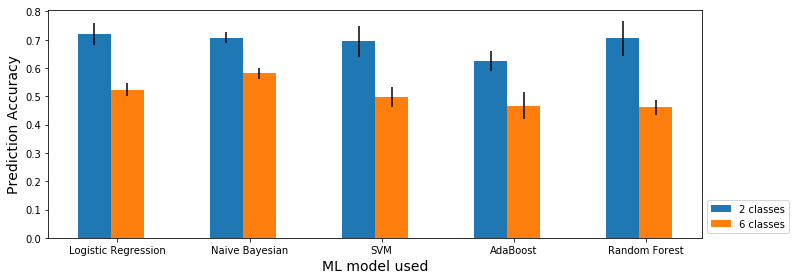

In [97]:

ind = np.arange(len(allRes))
fig, ax = plt.subplots()
width = 0.25
rects_c2 = ax.bar(ind, allRes['CV_res_2_mean'], width, yerr=allRes['CV_res_2_std'])
rects_c6 = ax.bar(ind+width, allRes['CV_res_6_mean'], width, yerr=allRes['CV_res_6_std'])
 
ax.legend((rects_c2[0], rects_c6[0]), ('2 classes', '6 classes'), bbox_to_anchor=(1.0, 0), loc='lower left')
ax.set_xticks(ind + (width+0.1) / 2)
ax.set_xticklabels(allRes['model_name'])

ax.set_title('', size=16)
ax.set_ylabel('Prediction Accuracy', size=14)
ax.set_xlabel('ML model used', size=14)
fig.set_size_inches((10,4))
plt.tight_layout()
plt.show()

## Digital Writer's Festival Quiz Results

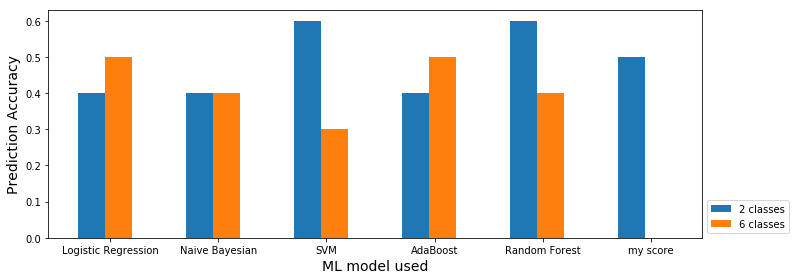

In [110]:
import numpy as np
ind = np.arange(len(allRes)+ 1)
fig, ax = plt.subplots()
width = 0.25

res2 = [g for g in allRes['DWFQ_res_2']]
res2.append(0.5)
rects_c2 = ax.bar(ind, res2, width)
res6 = [g for g in allRes['DWFQ_res_6']]
res6.append(0)
rects_c6 = ax.bar(ind+width, res6, width)
 
ax.legend((rects_c2[0], rects_c6[0]), ('2 classes', '6 classes'), bbox_to_anchor=(1.0, 0), loc='lower left')
ax.set_xticks(ind + (width+0.1) / 2)

xt = [g for g in allRes['model_name']]
xt.append('my score')
ax.set_xticklabels(xt)

ax.set_title('', size=16)
ax.set_ylabel('Prediction Accuracy', size=14)
ax.set_xlabel('ML model used', size=14)
fig.set_size_inches((10,4))
plt.tight_layout()
plt.show()

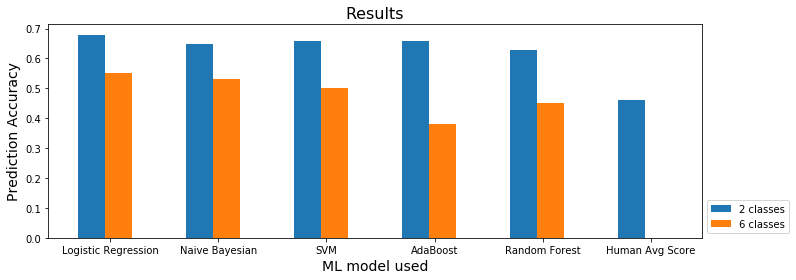

In [115]:
import numpy as np
ind = np.arange(len(allRes)+ 1)
fig, ax = plt.subplots()
width = 0.25

res2 = [g for g in allRes['hard_res_2']]
res2.append(0.462)
rects_c2 = ax.bar(ind, res2, width)
res6 = [g for g in allRes['hard_res_6']]
res6.append(0)
rects_c6 = ax.bar(ind+width, res6, width)
 
ax.legend((rects_c2[0], rects_c6[0]), ('2 classes', '6 classes'), bbox_to_anchor=(1.0, 0), loc='lower left')
ax.set_xticks(ind + (width+0.1) / 2)

xt = [g for g in allRes['model_name']]
xt.append('Human Avg Score')
ax.set_xticklabels(xt)

ax.set_title('Results', size=16)
ax.set_ylabel('Prediction Accuracy', size=14)
ax.set_xlabel('ML model used', size=14)
fig.set_size_inches((10,4))
plt.tight_layout()
plt.show()

In [112]:
#Trying to remove stop words :

opt_lr_pip_2 = [('vect', CountVectorizer(ngram_range=(1,1),stop_words='english')),
                      ('clf-lr', LogisticRegression(C=10.0, penalty='l2', tol=0.01))]

opt_lr_pip_6 = [('vect', CountVectorizer(ngram_range=(1,1),stop_words='english')),
               ('tfidf', TfidfTransformer()),
                      ('clf-lr', LogisticRegression(C=1000.0, penalty='l2', tol=0.01))]

opt_nb_pip = [('vect', CountVectorizer(ngram_range=(1,2),stop_words='english')),
                      ('clf', MultinomialNB(alpha=1e-2, fit_prior=True))]

opt_svm_pip_2 = [('vect', CountVectorizer(ngram_range=(1,2),stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='modified_huber', penalty='l2',
                                            alpha=1e-3, n_iter=5, random_state=42))]

opt_svm_pip_6 = [('vect', CountVectorizer(ngram_range=(1,2),stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='perceptron', penalty='l2',
                                            alpha=1e-2, n_iter=5, random_state=42))]
ada_pip = [('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf-ada', AdaBoostClassifier())]

opt_rf_pip_2 = [('vect', CountVectorizer(ngram_range=(1,2),stop_words='english')),
                      ('clf-rf', RandomForestClassifier(criterion='gini', max_features='auto', max_depth=4, n_estimators=100, bootstrap=False))]

opt_rf_pip_6 = [('vect', CountVectorizer(ngram_range=(1,2),stop_words='english')),
                      ('clf-rf', RandomForestClassifier(criterion='entropy', max_features=None, max_depth=None, n_estimators=100, bootstrap=True))]



pipsWoutSW = {
    "Logistic Regression": (opt_lr_pip_2, opt_lr_pip_6), 
    "Naive Bayesian": (opt_nb_pip, None),
    "SVM": (opt_svm_pip_2, opt_svm_pip_6),
    "AdaBoost": (ada_pip, None),
    "Random Forest": (opt_rf_pip_2, opt_rf_pip_6)
}


allResWoutSW = compare_pipelines(pipsWoutSW, 4)
allResWoutSW

,CV_res_2_mean,CV_res_2_std,CV_res_6_mean,CV_res_6_std,DWFQ_res_2,DWFQ_res_6,hard_res_2,hard_res_6,model_name
0,0.694805,0.052352,0.558442,0.024296,0.6,0.5,0.61,0.58,Logistic Regression
1,0.720779,0.019481,0.577922,0.011247,0.6,0.4,0.72,0.53,Naive Bayesian
2,0.733766,0.059159,0.555195,0.029579,0.5,0.5,0.65,0.50,SVM
3,0.603896,0.029757,0.529221,0.028118,0.6,0.5,0.52,0.57,AdaBoost
4,0.590909,0.052352,0.538961,0.021537,0.6,0.5,0.58,0.50,Random Forest


In [113]:
allRes

,CV_res_2_mean,CV_res_2_std,CV_res_6_mean,CV_res_6_std,DWFQ_res_2,DWFQ_res_6,hard_res_2,hard_res_6,model_name
0,0.720779,0.039498,0.522727,0.023186,0.4,0.5,0.68,0.55,Logistic Regression
1,0.707792,0.019481,0.581169,0.019208,0.4,0.4,0.65,0.53,Naive Bayesian
2,0.694805,0.055481,0.496753,0.036008,0.6,0.3,0.66,0.50,SVM
3,0.623377,0.035566,0.467532,0.046825,0.4,0.5,0.66,0.38,AdaBoost
4,0.704545,0.062537,0.461039,0.026773,0.6,0.4,0.63,0.45,Random Forest


## Trying to use Stemming

In [117]:
import nltk
#nltk.download()
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

stemmed_count_vect = StemmedCountVectorizer(stop_words='english')


In [118]:
#Stemming + remove stop words :

opt_lr_pip_2 = [('vect', StemmedCountVectorizer(ngram_range=(1,1),stop_words='english')),
                      ('clf-lr', LogisticRegression(C=10.0, penalty='l2', tol=0.01))]

opt_lr_pip_6 = [('vect', StemmedCountVectorizer(ngram_range=(1,1),stop_words='english')),
               ('tfidf', TfidfTransformer()),
                      ('clf-lr', LogisticRegression(C=1000.0, penalty='l2', tol=0.01))]

opt_nb_pip = [('vect', StemmedCountVectorizer(ngram_range=(1,2),stop_words='english')),
                      ('clf', MultinomialNB(alpha=1e-2, fit_prior=True))]

opt_svm_pip_2 = [('vect', StemmedCountVectorizer(ngram_range=(1,2),stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='modified_huber', penalty='l2',
                                            alpha=1e-3, n_iter=5, random_state=42))]

opt_svm_pip_6 = [('vect', StemmedCountVectorizer(ngram_range=(1,2),stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='perceptron', penalty='l2',
                                            alpha=1e-2, n_iter=5, random_state=42))]
ada_pip = [('vect', StemmedCountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf-ada', AdaBoostClassifier())]

opt_rf_pip_2 = [('vect', StemmedCountVectorizer(ngram_range=(1,2),stop_words='english')),
                      ('clf-rf', RandomForestClassifier(criterion='gini', max_features='auto', max_depth=4, n_estimators=100, bootstrap=False))]

opt_rf_pip_6 = [('vect', StemmedCountVectorizer(ngram_range=(1,2),stop_words='english')),
                      ('clf-rf', RandomForestClassifier(criterion='entropy', max_features=None, max_depth=None, n_estimators=100, bootstrap=True))]



pipsStemming = {
    "Logistic Regression": (opt_lr_pip_2, opt_lr_pip_6), 
    "Naive Bayesian": (opt_nb_pip, None),
    "SVM": (opt_svm_pip_2, opt_svm_pip_6),
    "AdaBoost": (ada_pip, None),
    "Random Forest": (opt_rf_pip_2, opt_rf_pip_6)
}


allResStemming = compare_pipelines(pipsStemming, 4)
allResStemming

,CV_res_2_mean,CV_res_2_std,CV_res_6_mean,CV_res_6_std,DWFQ_res_2,DWFQ_res_6,hard_res_2,hard_res_6,model_name
0,0.714286,0.055859,0.551948,0.021537,0.5,0.5,0.60,0.59,Logistic Regression
1,0.727273,0.024296,0.564935,0.014520,0.6,0.5,0.69,0.54,Naive Bayesian
2,0.704545,0.056142,0.542208,0.024939,0.5,0.4,0.66,0.54,SVM
3,0.607143,0.048917,0.516234,0.029579,0.6,0.5,0.53,0.58,AdaBoost
4,0.636364,0.055859,0.512987,0.021537,0.5,0.5,0.59,0.49,Random Forest


In [120]:
#Stemming but with stop words

opt_lr_pip_2 = [('vect', StemmedCountVectorizer(ngram_range=(1,1))),
                      ('clf-lr', LogisticRegression(C=10.0, penalty='l2', tol=0.01))]

opt_lr_pip_6 = [('vect', StemmedCountVectorizer(ngram_range=(1,1))),
               ('tfidf', TfidfTransformer()),
                      ('clf-lr', LogisticRegression(C=1000.0, penalty='l2', tol=0.01))]

opt_nb_pip = [('vect', StemmedCountVectorizer(ngram_range=(1,2))),
                      ('clf', MultinomialNB(alpha=1e-2, fit_prior=True))]

opt_svm_pip_2 = [('vect', StemmedCountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='modified_huber', penalty='l2',
                                            alpha=1e-3, n_iter=5, random_state=42))]

opt_svm_pip_6 = [('vect', StemmedCountVectorizer(ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='perceptron', penalty='l2',
                                            alpha=1e-2, n_iter=5, random_state=42))]
ada_pip = [('vect', StemmedCountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-ada', AdaBoostClassifier())]

opt_rf_pip_2 = [('vect', StemmedCountVectorizer(ngram_range=(1,2))),
                      ('clf-rf', RandomForestClassifier(criterion='gini', max_features='auto', max_depth=4, n_estimators=100, bootstrap=False))]

opt_rf_pip_6 = [('vect', StemmedCountVectorizer(ngram_range=(1,2))),
                      ('clf-rf', RandomForestClassifier(criterion='entropy', max_features=None, max_depth=None, n_estimators=100, bootstrap=True))]



pipsStemmingSW = {
    "Logistic Regression": (opt_lr_pip_2, opt_lr_pip_6), 
    "Naive Bayesian": (opt_nb_pip, None),
    "SVM": (opt_svm_pip_2, opt_svm_pip_6),
    "AdaBoost": (ada_pip, None),
    "Random Forest": (opt_rf_pip_2, opt_rf_pip_6)
}


allResStemmingSW = compare_pipelines(pipsStemmingSW, 4)
allResStemmingSW

,CV_res_2_mean,CV_res_2_std,CV_res_6_mean,CV_res_6_std,DWFQ_res_2,DWFQ_res_6,hard_res_2,hard_res_6,model_name
0,0.704545,0.042457,0.535714,0.014152,0.5,0.5,0.67,0.55,Logistic Regression
1,0.704545,0.023186,0.577922,0.023413,0.5,0.5,0.67,0.52,Naive Bayesian
2,0.691558,0.057624,0.512987,0.032468,0.5,0.4,0.72,0.45,SVM
3,0.574675,0.087783,0.470779,0.046259,0.7,0.5,0.62,0.39,AdaBoost
4,0.685065,0.048917,0.444805,0.019208,0.6,0.4,0.65,0.41,Random Forest


In [1]:
### Word2Vec Tentative

